In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import gdown

In [2]:
file_id = "1bu_--mo79VdUG9oin4ybfFGRUSXAe-WE"
url = f"https://drive.google.com/uc?id={file_id}"
output = "Customers.csv" 
gdown.download(url, output, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1bu_--mo79VdUG9oin4ybfFGRUSXAe-WE
To: C:\Users\purvi\Customers.csv
100%|██████████| 8.54k/8.54k [00:00<?, ?B/s]


'Customers.csv'

In [3]:
file_id = "1IKuDizVapw-hyktwfpoAoaGtHtTNHfd0"
url = f"https://drive.google.com/uc?id={file_id}"
output = "Products.csv" 
gdown.download(url, output, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1IKuDizVapw-hyktwfpoAoaGtHtTNHfd0
To: C:\Users\purvi\Products.csv
100%|██████████| 4.25k/4.25k [00:00<?, ?B/s]


'Products.csv'

In [4]:
file_id = "1saEqdbBB-vuk2hxoAf4TzDEsykdKlzbF"
url = f"https://drive.google.com/uc?id={file_id}"
output = "Transactions.csv" 
gdown.download(url, output, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1saEqdbBB-vuk2hxoAf4TzDEsykdKlzbF
To: C:\Users\purvi\Transactions.csv
100%|██████████| 54.7k/54.7k [00:00<00:00, 90.8kB/s]


'Transactions.csv'

In [5]:
customer = pd.read_csv("Customers.csv")
customer.head()

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


In [6]:
product = pd.read_csv("Products.csv")
product.head()

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31


In [7]:
transaction = pd.read_csv("Transactions.csv")
transaction.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


In [8]:
transactions_products = transaction.merge(product, on="ProductID", how="left")
df = transactions_products.merge(customer, on="CustomerID", how="left")
df.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price_x,ProductName,Category,Price_y,CustomerName,Region,SignupDate
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,ComfortLiving Bluetooth Speaker,Electronics,300.68,Andrea Jenkins,Europe,2022-12-03
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,ComfortLiving Bluetooth Speaker,Electronics,300.68,Brittany Harvey,Asia,2024-09-04
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,ComfortLiving Bluetooth Speaker,Electronics,300.68,Kathryn Stevens,Europe,2024-04-04
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,ComfortLiving Bluetooth Speaker,Electronics,300.68,Travis Campbell,South America,2024-04-11
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,ComfortLiving Bluetooth Speaker,Electronics,300.68,Timothy Perez,Europe,2022-03-15


In [9]:
df.shape

(1000, 13)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price_x          1000 non-null   float64
 7   ProductName      1000 non-null   object 
 8   Category         1000 non-null   object 
 9   Price_y          1000 non-null   float64
 10  CustomerName     1000 non-null   object 
 11  Region           1000 non-null   object 
 12  SignupDate       1000 non-null   object 
dtypes: float64(3), int64(1), object(9)
memory usage: 109.4+ KB


In [11]:
df.drop(['CustomerID', 'ProductID', 'TransactionID'], axis=1, inplace=True)

In [12]:
df.describe()

,Quantity,TotalValue,Price_x,Price_y
count,1000.000000,1000.000000,1000.00000,1000.00000
mean,2.537000,689.995560,272.55407,272.55407
std,1.117981,493.144478,140.73639,140.73639
min,1.000000,16.080000,16.08000,16.08000
25%,2.000000,295.295000,147.95000,147.95000
50%,3.000000,588.880000,299.93000,299.93000
75%,4.000000,1011.660000,404.40000,404.40000
max,4.000000,1991.040000,497.76000,497.76000


1. Most transactions involve 2–3 units, meaning small to moderate purchases.
2. 25% of transactions involve 2 or less units.
3. Then, 50% of transactions involve exactly 3 units.
4. And 25% of transactions involve the maximum of 4 units, showing that larger purchases are less common.

This means, small purchase sizes could mean that customers are either buying high-value items or focusing on targeted purchases.The mean transaction value is 690 dollars, but the standard deviation of 493 dollars suggests a variation in transaction values. This means that some customers make small purchases, while others contribute disproportionately high-value transactions.

In [13]:
df.head()

,TransactionDate,Quantity,TotalValue,Price_x,ProductName,Category,Price_y,CustomerName,Region,SignupDate
0,2024-08-25 12:38:23,1,300.68,300.68,ComfortLiving Bluetooth Speaker,Electronics,300.68,Andrea Jenkins,Europe,2022-12-03
1,2024-05-27 22:23:54,1,300.68,300.68,ComfortLiving Bluetooth Speaker,Electronics,300.68,Brittany Harvey,Asia,2024-09-04
2,2024-04-25 07:38:55,1,300.68,300.68,ComfortLiving Bluetooth Speaker,Electronics,300.68,Kathryn Stevens,Europe,2024-04-04
3,2024-03-26 22:55:37,2,601.36,300.68,ComfortLiving Bluetooth Speaker,Electronics,300.68,Travis Campbell,South America,2024-04-11
4,2024-03-21 15:10:10,3,902.04,300.68,ComfortLiving Bluetooth Speaker,Electronics,300.68,Timothy Perez,Europe,2022-03-15


In [14]:
product_insights = (
    df.groupby('ProductName')
    .agg({'Quantity': 'sum', 'TotalValue': 'sum', 'TransactionDate': 'count'})
    .rename(columns={'TransactionDate': 'Transactions'})
    .sort_values(by='TotalValue', ascending=False)
)
print(product_insights.head())

                       Quantity  TotalValue  Transactions
ProductName                                              
ActiveWear Smartwatch       100    39096.97            40
SoundWave Headphones         97    25211.64            38
SoundWave Novel              58    24507.90            20
ActiveWear Jacket            76    22712.56            26
ActiveWear Rug               79    22314.43            29


In [15]:
region_insights = df.groupby('Region').agg({'TotalValue': 'sum', 'Quantity': 'sum'}).sort_values(by='TotalValue', ascending=False)
print(region_insights)

# Top categories per region
region_category = df.groupby(['Region', 'Category'])['TotalValue'].sum().reset_index()
print(region_category.sort_values(by='TotalValue', ascending=False).head())

               TotalValue  Quantity
Region                             
South America   219352.56       789
Europe          166254.63       595
North America   152313.40       593
Asia            152074.97       560
           Region     Category  TotalValue
12  South America        Books    69752.03
14  South America  Electronics    58846.32
1            Asia     Clothing    49353.09
15  South America   Home Decor    48310.72
4          Europe        Books    47464.42


Top 10 Best-Selling Products by Total Revenue:
                         Quantity  TotalValue
ProductName                                  
ActiveWear Smartwatch         100    39096.97
SoundWave Headphones           97    25211.64
SoundWave Novel                58    24507.90
ActiveWear Jacket              76    22712.56
ActiveWear Rug                 79    22314.43
TechPro Headphones             45    19513.80
BookWorld Cookbook             48    19221.99
BookWorld Sweater              47    18743.79
TechPro Textbook               62    18267.96
ActiveWear Cookware Set        51    18083.73


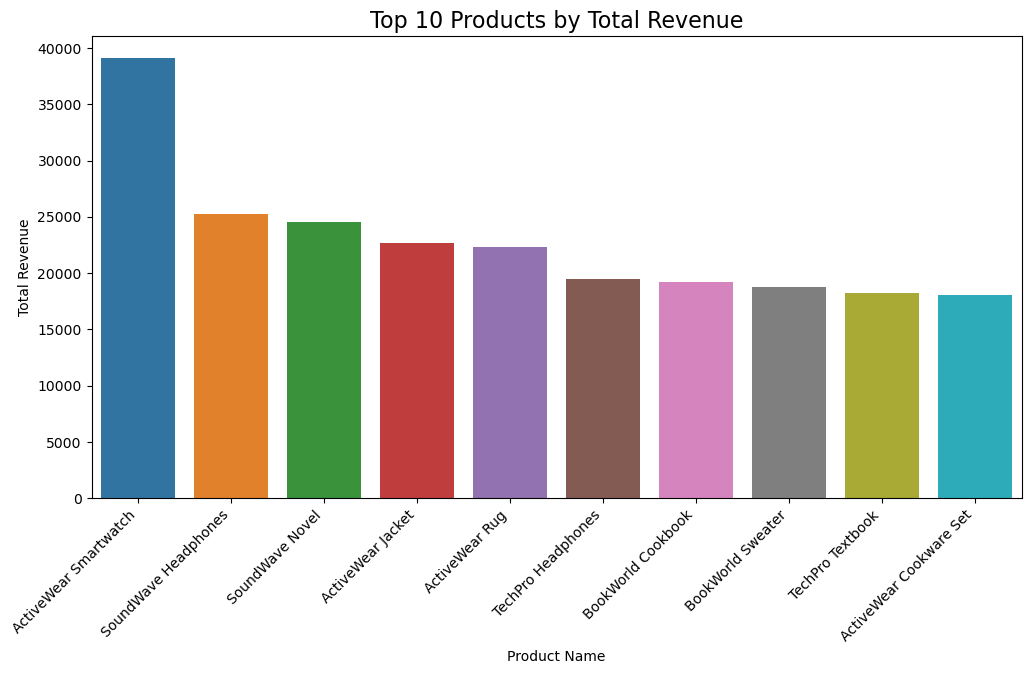

In [16]:
product_performance = df.groupby('ProductName').agg({
    'Quantity': 'sum',
    'TotalValue': 'sum'
}).sort_values(by='TotalValue', ascending=False)

print("Top 10 Best-Selling Products by Total Revenue:")
print(product_performance.head(10))
plt.figure(figsize=(12, 6))
sns.barplot(
    x=product_performance.head(10).index, 
    y=product_performance['TotalValue'].head(10)
)
plt.title("Top 10 Products by Total Revenue", fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.ylabel("Total Revenue")
plt.xlabel("Product Name")
plt.show()

Regional performance by total revenue:
               Quantity  TotalValue
Region                             
South America       789   219352.56
Europe              595   166254.63
North America       593   152313.40
Asia                560   152074.97


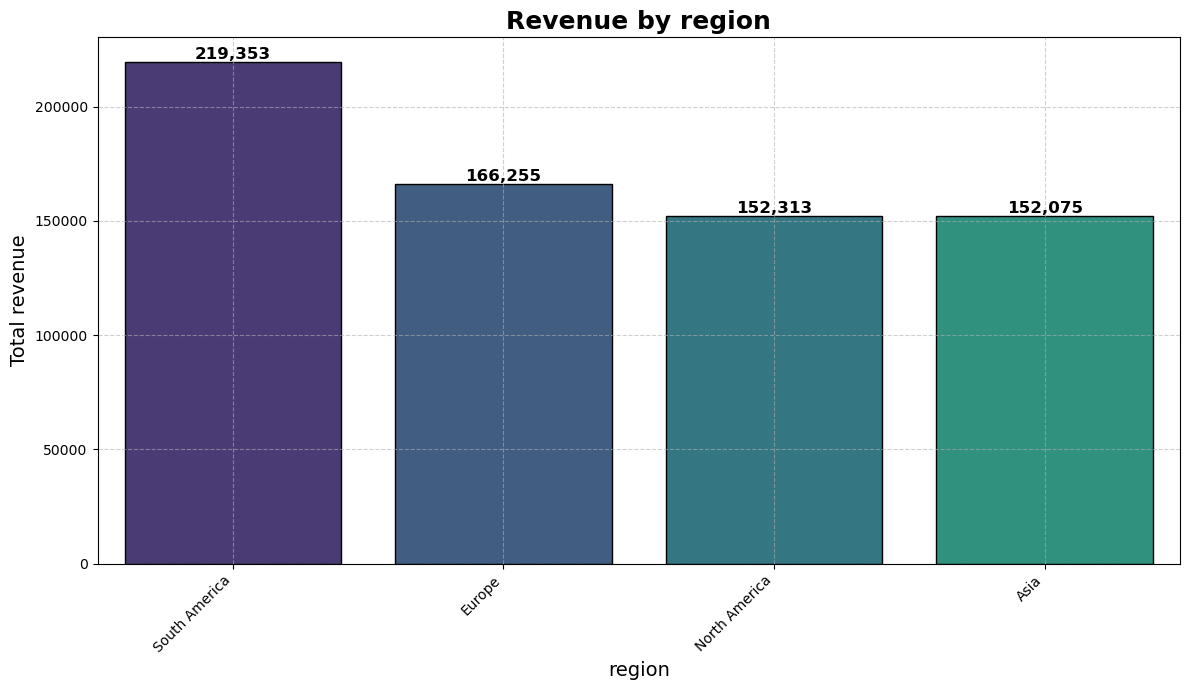

In [28]:
region_performance = df.groupby('Region').agg({
    'Quantity': 'sum',
    'TotalValue': 'sum'
}).sort_values(by='TotalValue', ascending=False)

print("Regional performance by total revenue:")
print(region_performance)
plt.figure(figsize=(12, 7))
sns.set_palette("viridis")
sns.barplot(
    x=region_performance.index, 
    y=region_performance['TotalValue'], 
    ci=None,  
    edgecolor="black"  
)
for p in plt.gca().patches:
    plt.text(
        p.get_x() + p.get_width() / 2., 
        p.get_height() + 0.01, 
        f'{p.get_height():,.0f}', 
        ha='center', 
        va='bottom', 
        fontsize=12, 
        fontweight='bold', 
        color='black'
    )
plt.title("Revenue by region", fontsize=18, fontweight='bold')
plt.xlabel("region", fontsize=14)
plt.ylabel("Total revenue", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()  
plt.show()

Category Performance by Total Revenue:
             Quantity  TotalValue
Category                         
Books             681   192147.47
Electronics       627   180783.50
Clothing          590   166170.66
Home Decor        639   150893.93


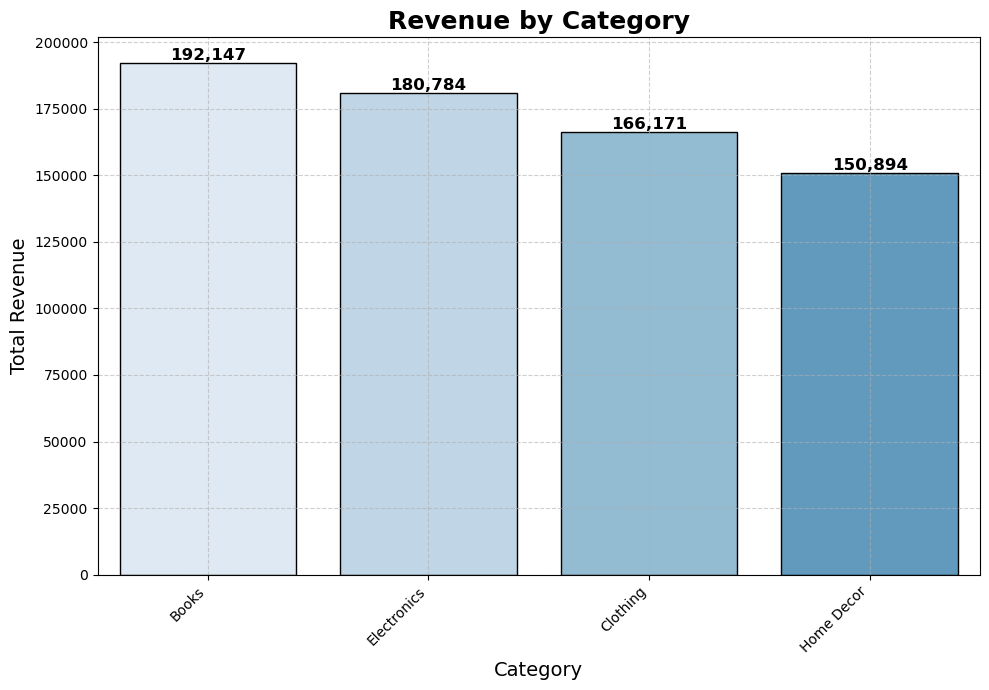

In [29]:
category_performance = df.groupby('Category').agg({
    'Quantity': 'sum',
    'TotalValue': 'sum'
}).sort_values(by='TotalValue', ascending=False)

print("Category Performance by Total Revenue:")
print(category_performance)
plt.figure(figsize=(10, 7))
sns.set_palette("Blues")
sns.barplot(
    x=category_performance.index, 
    y=category_performance['TotalValue'], 
    ci=None, 
    edgecolor="black"  
)
for p in plt.gca().patches:
    plt.text(
        p.get_x() + p.get_width() / 2., 
        p.get_height() + 0.01, 
        f'{p.get_height():,.0f}', 
        ha='center', 
        va='bottom', 
        fontsize=12, 
        fontweight='bold', 
        color='black'
    )
plt.title("Revenue by Category", fontsize=18, fontweight='bold')
plt.xlabel("Category", fontsize=14)
plt.ylabel("Total Revenue", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()  
plt.show()

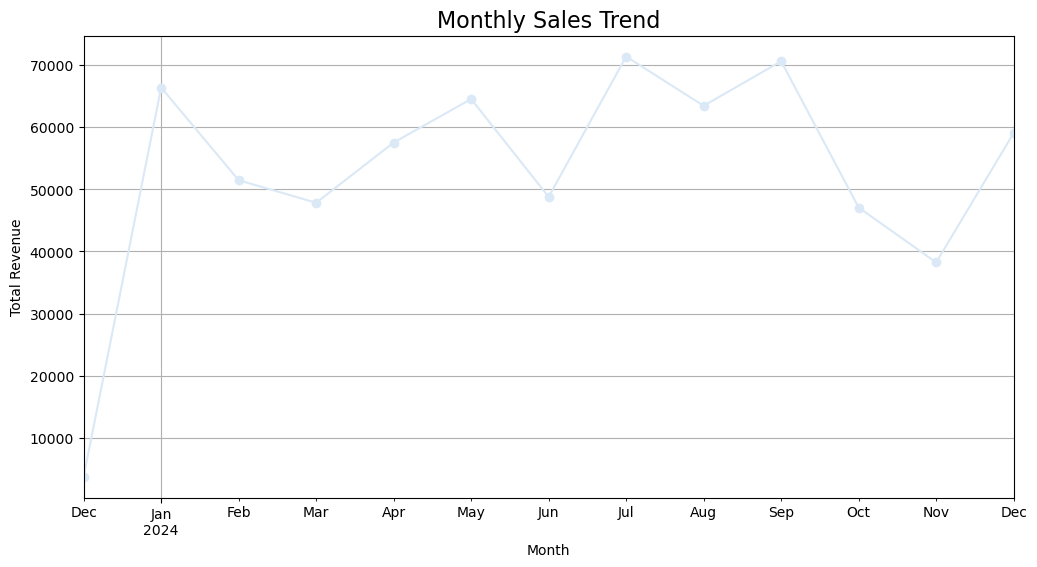

In [19]:
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])
df['Month'] = df['TransactionDate'].dt.to_period('M')

# Total sales by month
monthly_sales = df.groupby('Month')['TotalValue'].sum()
plt.figure(figsize=(12, 6))
monthly_sales.plot(kind='line', marker='o')
plt.title("Monthly Sales Trend", fontsize=16)
plt.ylabel("Total Revenue")
plt.xlabel("Month")
plt.grid(True)
plt.show()

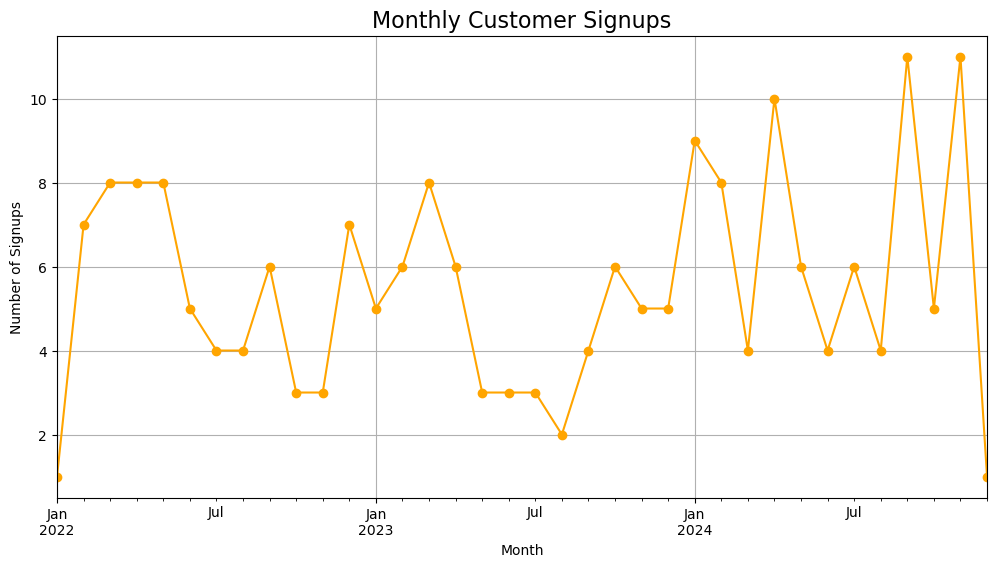

In [20]:
df['SignupDate'] = pd.to_datetime(df['SignupDate'])
df['SignupMonth'] = df['SignupDate'].dt.to_period('M')
signup_trends = df.groupby('SignupMonth')['CustomerName'].nunique()
plt.figure(figsize=(12, 6))
signup_trends.plot(kind='line', marker='o', color='orange')
plt.title("Monthly Customer Signups", fontsize=16)
plt.ylabel("Number of Signups")
plt.xlabel("Month")
plt.grid(True)
plt.show()

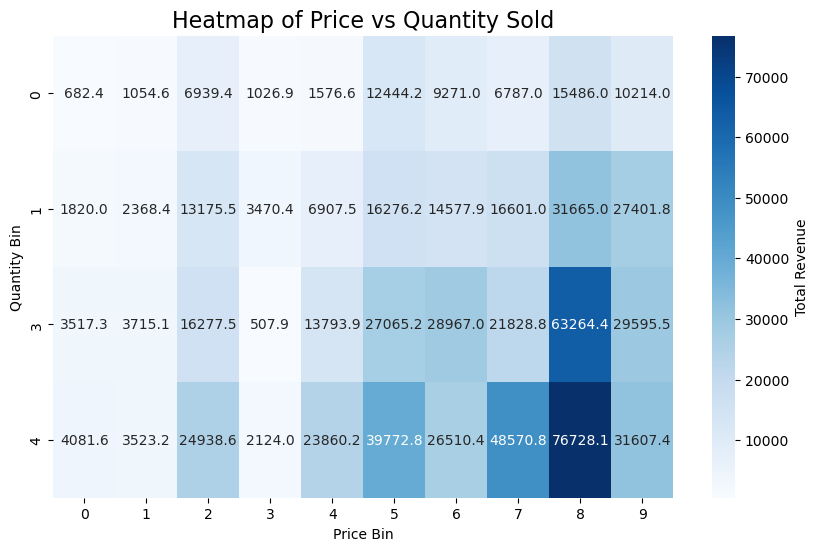

In [21]:
# Bin Price and Quantity for heatmap
df['PriceBin'] = pd.cut(df['Price_x'], bins=10, labels=False)
df['QuantityBin'] = pd.cut(df['Quantity'], bins=5, labels=False)
heatmap_data = df.pivot_table(index='QuantityBin', columns='PriceBin', values='TotalValue', aggfunc='sum')
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, cmap="Blues", annot=True, fmt=".1f", cbar_kws={'label': 'Total Revenue'})
plt.title("Heatmap of Price vs Quantity Sold", fontsize=16)
plt.ylabel("Quantity Bin")
plt.xlabel("Price Bin")
plt.show()

In [22]:
correlation_matrix = df[['Quantity', 'TotalValue', 'Price_x', 'Price_y']].corr()

print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
            Quantity  TotalValue   Price_x   Price_y
Quantity    1.000000    0.609972 -0.009378 -0.009378
TotalValue  0.609972    1.000000  0.722714  0.722714
Price_x    -0.009378    0.722714  1.000000  1.000000
Price_y    -0.009378    0.722714  1.000000  1.000000


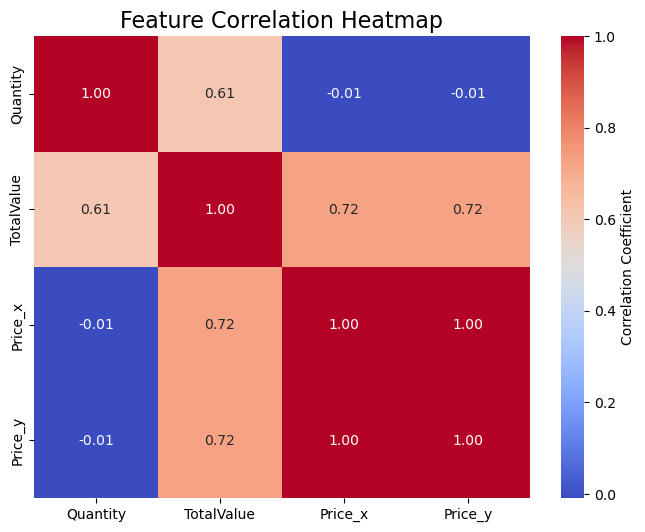

In [23]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar_kws={'label': 'Correlation Coefficient'})
plt.title("Feature Correlation Heatmap", fontsize=16)
plt.show()

Revenue Contribution from Repeat vs One-Time Customers:
IsRepeat
False      6340.97
True     683654.59
Name: TotalValue, dtype: float64


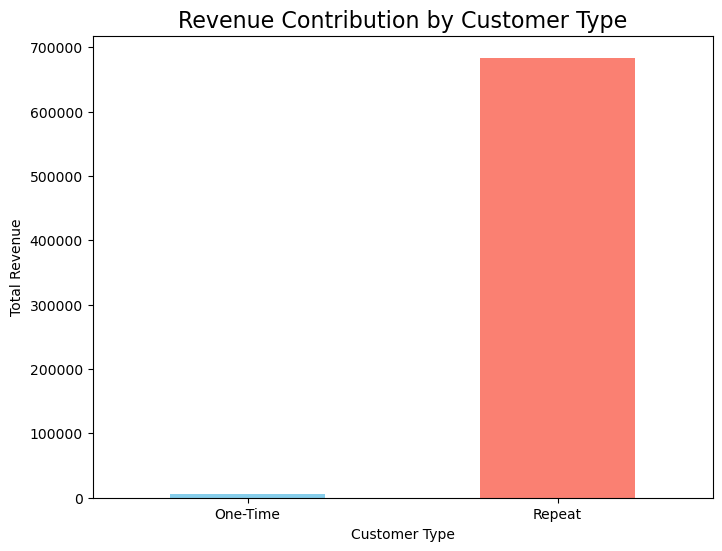

In [24]:
customer_repeat = df.groupby('CustomerName').agg({
    'TransactionDate': 'count',
    'TotalValue': 'sum'
}).rename(columns={'TransactionDate': 'TransactionCount'})

customer_repeat['IsRepeat'] = customer_repeat['TransactionCount'] > 1
repeat_analysis = customer_repeat.groupby('IsRepeat')['TotalValue'].sum()

print("Revenue Contribution from Repeat vs One-Time Customers:")
print(repeat_analysis)
plt.figure(figsize=(8, 6))
repeat_analysis.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title("Revenue Contribution by Customer Type", fontsize=16)
plt.ylabel("Total Revenue")
plt.xlabel("Customer Type")
plt.xticks(ticks=[0, 1], labels=['One-Time', 'Repeat'], rotation=0)
plt.show()

Average Revenue Per Customer by Region:
Region
Asia             697.591606
Europe           710.489872
North America    624.235246
South America    721.554474
Name: TotalValue, dtype: float64


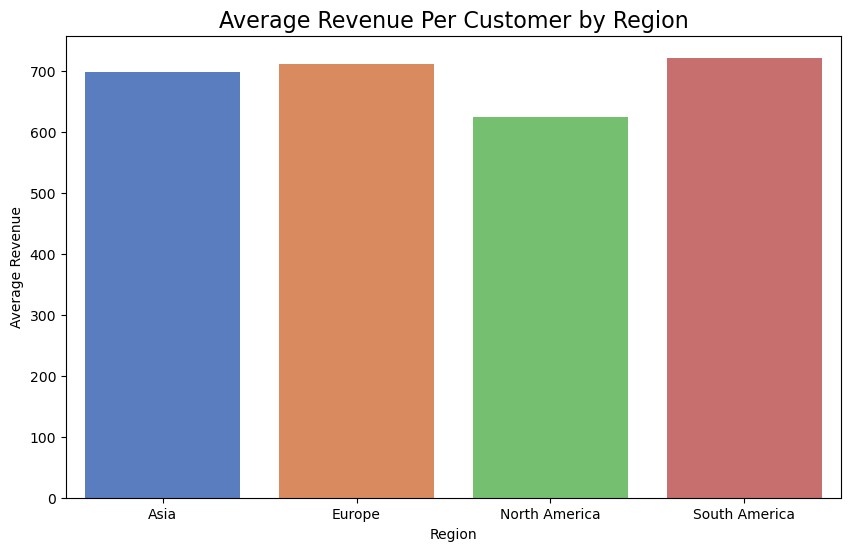

In [25]:
avg_revenue_region = df.groupby('Region')['TotalValue'].mean()

print("Average Revenue Per Customer by Region:")
print(avg_revenue_region)
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_revenue_region.index, y=avg_revenue_region.values, palette="muted")
plt.title("Average Revenue Per Customer by Region", fontsize=16)
plt.ylabel("Average Revenue")
plt.xlabel("Region")
plt.show()

Region-Wise Customer Behavior:
               AvgTransactionValue  AvgTransactionQuantity
Region                                                    
Asia                    697.591606                2.568807
Europe                  710.489872                2.542735
North America           624.235246                2.430328
South America           721.554474                2.595395


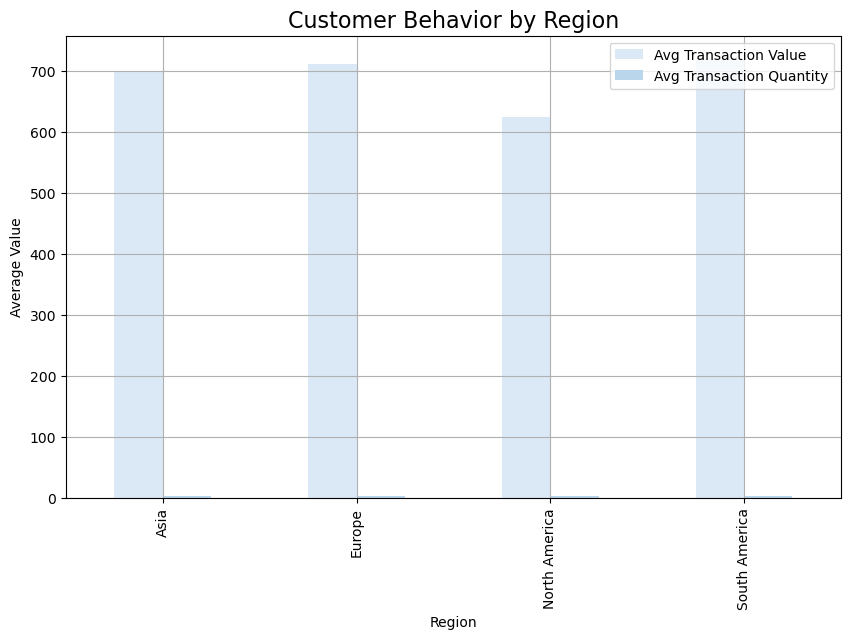

In [26]:
region_customer_behavior = df.groupby('Region').agg({
    'TotalValue': 'mean',
    'Quantity': 'mean'
}).rename(columns={
    'TotalValue': 'AvgTransactionValue',
    'Quantity': 'AvgTransactionQuantity'
})

print("Region-Wise Customer Behavior:")
print(region_customer_behavior)
region_customer_behavior.plot(kind='bar', figsize=(10, 6))
plt.title("Customer Behavior by Region", fontsize=16)
plt.ylabel("Average Value")
plt.xlabel("Region")
plt.legend(["Avg Transaction Value", "Avg Transaction Quantity"])
plt.grid(True)
plt.show()